<a href="https://colab.research.google.com/github/gundaminpde/2023_F_ML_lecture/blob/main/SARSA_easy_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## gym 버전 down-grade

!pip install gym==0.17.3
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

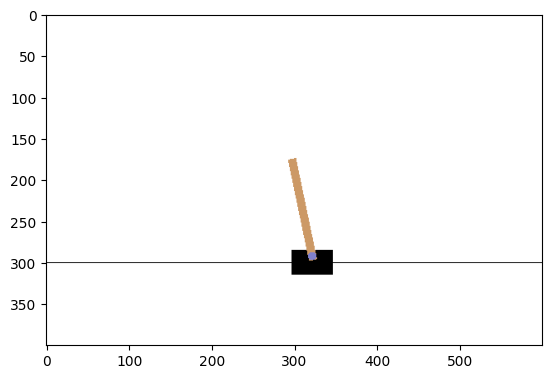

In [ ]:
import gym
from gym.wrappers.monitor import Monitor
import numpy as np
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

env = gym.make('CartPole-v1')
env = Monitor(env, './video', force=True)
env.reset()

# SARSA 알고리즘 매개변수
learning_rate = 0.3 ## 원래는 0.1
discount_factor = 0.99
epsilon = 0.3 ## 원래는 0.1

# 상태-액션 값 함수 초기화
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# 에피소드 수행
num_episodes = 10 ## 원래는 1000
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    # 현재 상태에 대한 액션 선택
    action = np.argmax(q_table[state.astype(int)])

    while not done:
        # 액션 적용
        next_state, reward, done, _ = env.step(action)

        # 다음 상태에 대한 액션 선택
        next_action = np.argmax(q_table[next_state.astype(int)])

        # SARSA 업데이트
        td_target = reward + discount_factor * q_table[next_state.astype(int), next_action.astype(int)]
        td_error = td_target - q_table[state.astype(int), action]
        q_table[state.astype(int), action] += learning_rate * td_error

        state = next_state
        action = next_action
        total_reward += reward

        if np.random.rand() < epsilon:
            action = env.action_space.sample()

        plt.imshow(env.render(mode='rgb_array'))
        ipythondisplay.display(plt.gcf())
        ipythondisplay.clear_output(wait=True)

    episode_rewards.append(total_reward)

env.close()

# 에피소드별 보상 출력
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards')
plt.show()